In [36]:
import torch
import torch.nn as nn
import numpy as numpy
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
df=pd.read_csv(r"C:\Users\Chana\Downloads\convertcsv.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       100 non-null    float64
 1   Y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [42]:

X = df["X"].values
Y = df["Y"].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
Y_train = torch.tensor(Y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
Y_test = torch.tensor(Y_test, dtype=torch.float32).unsqueeze(1)

In [110]:
scalerx=StandardScaler()
scalery=StandardScaler()

xtrain=torch.tensor(scalerx.fit_transform(X_train),dtype=torch.float32)
ytrain=torch.tensor(scalery.fit_transform(Y_train),dtype=torch.float32)
xtest=torch.tensor(scalerx.transform(X_test),dtype=torch.float32)
ytest=torch.tensor(scalery.transform(Y_test),dtype=torch.float32)
xtrain,xtest,ytrain,ytest

(tensor([[ 0.1472],
         [ 1.2903],
         [-0.8573],
         [-0.3031],
         [ 0.6322],
         [-1.2384],
         [-0.3724],
         [ 1.5674],
         [-1.4462],
         [ 0.7361],
         [-1.3769],
         [-0.1299],
         [ 1.1864],
         [-0.7880],
         [ 1.4635],
         [-1.5848],
         [ 0.5283],
         [ 0.4936],
         [-0.5456],
         [-1.2037],
         [-0.0606],
         [-0.5802],
         [-1.5155],
         [ 1.5328],
         [-0.8227],
         [-1.0998],
         [ 1.0478],
         [-0.8920],
         [ 0.3897],
         [-1.3076],
         [-0.9266],
         [-1.6540],
         [-1.1691],
         [-0.4417],
         [-1.4808],
         [ 0.9439],
         [-1.5501],
         [ 0.4590],
         [-0.5109],
         [ 1.3250],
         [ 0.1819],
         [ 1.6713],
         [ 0.1126],
         [-0.2685],
         [-0.0260],
         [ 0.5629],
         [-0.1645],
         [ 0.5975],
         [ 0.3551],
         [ 1.6021],


In [112]:
epochs=100
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.model=nn.Linear(1,1)
    def forward(self,x):
        return self.model(x)
model1=model()
optimizer=torch.optim.SGD(model1.parameters(),lr=0.005)
lossfunction=nn.MSELoss()

In [141]:
list(model1.parameters())

# [Parameter containing:
#  tensor([[0.8654]], requires_grad=True),
#  Parameter containing:
#  tensor([0.0556], requires_grad=True)]

[Parameter containing:
 tensor([[0.8654]], requires_grad=True),
 Parameter containing:
 tensor([0.0556], requires_grad=True)]

In [143]:
for i in range(epochs):
    model1.train()
    out=model1(xtrain)
    loss=lossfunction(out,ytrain)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f'epoch number:{i}:loss={loss}')

# epoch number:99:loss=0.0031720399856567383

epoch number:0:loss=0.0214415080845356
epoch number:1:loss=0.021020378917455673
epoch number:2:loss=0.020607616752386093
epoch number:3:loss=0.020203087478876114
epoch number:4:loss=0.019806601107120514
epoch number:5:loss=0.019418006762862206
epoch number:6:loss=0.019037138670682907
epoch number:7:loss=0.018663857132196426
epoch number:8:loss=0.018297996371984482
epoch number:9:loss=0.017939426004886627
epoch number:10:loss=0.017587993294000626
epoch number:11:loss=0.017243552953004837
epoch number:12:loss=0.01690596342086792
epoch number:13:loss=0.01657509058713913
epoch number:14:loss=0.016250811517238617
epoch number:15:loss=0.015932966023683548
epoch number:16:loss=0.015621448867022991
epoch number:17:loss=0.01531613152474165
epoch number:18:loss=0.015016901306807995
epoch number:19:loss=0.014723619446158409
epoch number:20:loss=0.014436179772019386
epoch number:21:loss=0.014154454693198204
epoch number:22:loss=0.013878338038921356
epoch number:23:loss=0.013607708737254143
epoch n

In [145]:
list(model1.parameters())
#new parameter values
# [Parameter containing:
#  tensor([[0.9506]], requires_grad=True),
#  Parameter containing:
#  tensor([0.0203], requires_grad=True)]

[Parameter containing:
 tensor([[0.9506]], requires_grad=True),
 Parameter containing:
 tensor([0.0203], requires_grad=True)]

In [147]:
import torch.nn.functional as F
model1.eval()
with torch.inference_mode():
    pred=model1(xtest)
    mse = F.mse_loss(pred, ytest)
pred,mse

(tensor([[ 1.0823],
         [ 0.0944],
         [ 0.6542],
         [-0.1690],
         [-0.2019],
         [-0.3666],
         [-0.9264],
         [ 0.9835],
         [-1.3216],
         [-1.6509],
         [-1.0581],
         [-0.6630],
         [ 0.7530],
         [-0.5642],
         [ 1.3128],
         [-1.5191],
         [ 0.8518],
         [ 0.8847],
         [-1.2557],
         [-0.6300]]),
 tensor(0.0031))

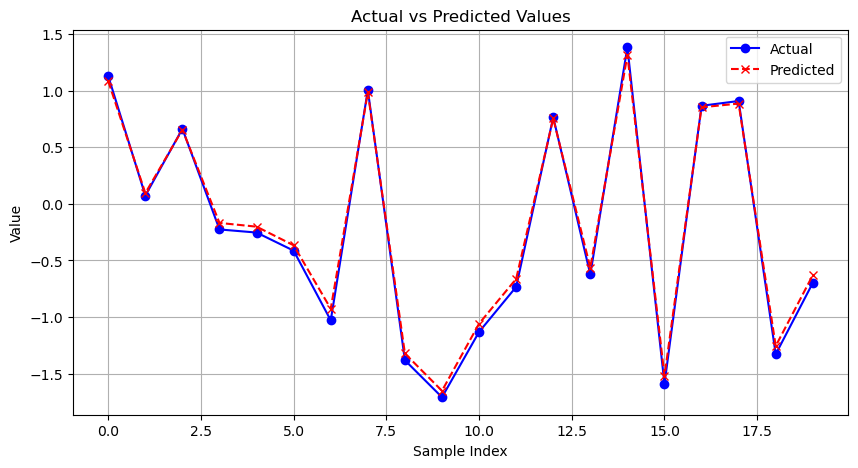

In [150]:

plt.figure(figsize=(10, 5))

plt.plot(ytest, label='Actual', color='b', marker='o', linestyle='-')

plt.plot(pred, label='Predicted', color='r', marker='x', linestyle='--')

plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()